In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('wine.csv')
dataset.head

<bound method NDFrame.head of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \


In [3]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Cummulative Variace Explained:100.0%


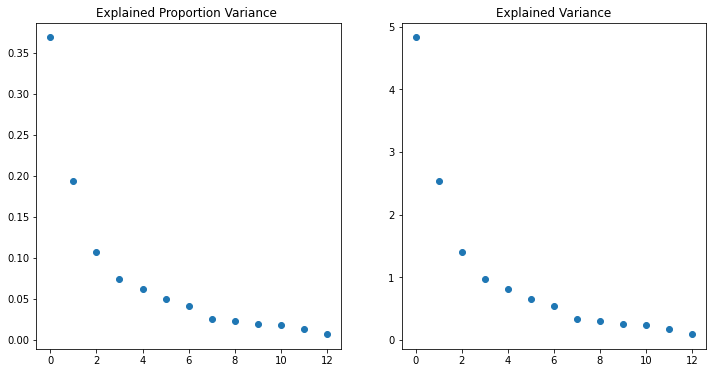

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

def show_explained_variance(data_pca):
    plt.rcParams['figure.figsize'] = [12, 6]
    f, (ax1, ax2) = plt.subplots(1,2)
    print(f'Cummulative Variace Explained:{round(100*sum(data_pca.explained_variance_ratio_),1)}%')
    ax1.set_title('Explained Proportion Variance ')
    ax1.plot(data_pca.explained_variance_ratio_, 'o')
    ax2.set_title('Explained Variance')
    ax2.plot(data_pca.explained_variance_, 'o')
show_explained_variance(pca)

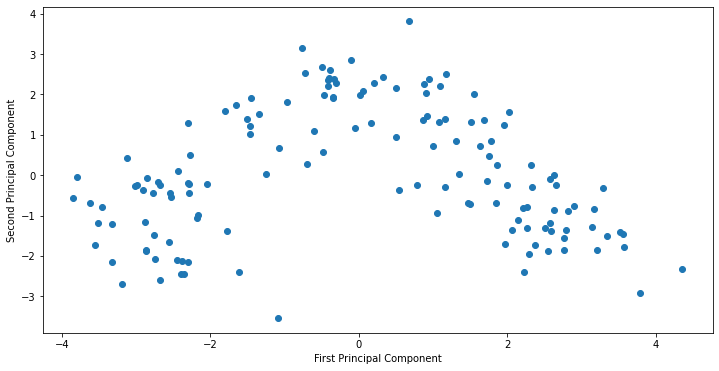

In [10]:

X_train_pca = pca.transform(X_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

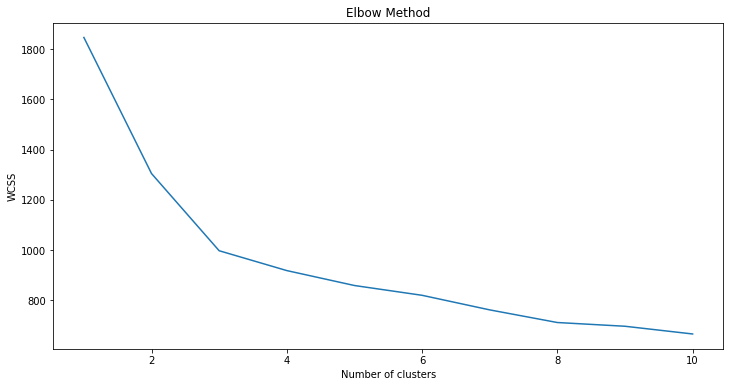

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

















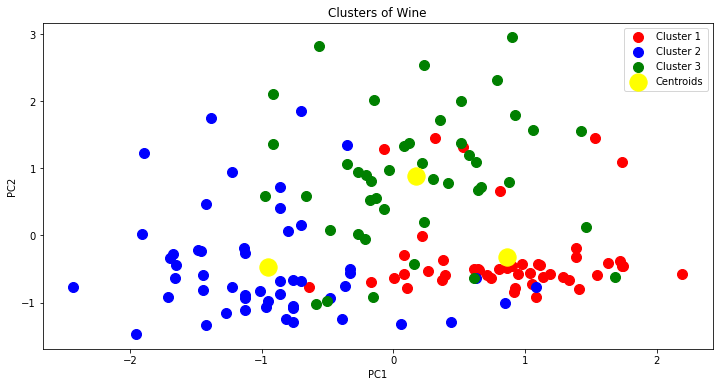

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Wine')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()